# Fractional Brownian Expectations
Let $Z_t^H$ denote a fractional brownian motion path with parameter $H$ as a function of time. The mean, variance and covariance are given by,<br>

$
\begin{align}
&\text{E}[Z^H_t] = 0 \\
&\text{Var}[Z_t^H] = t^{2H} \\
&R^H(t,s) = \text{Cov}[Z^H_t Z^H_s] = \frac{1}{2}[t^{2H}+s^{2H}-(t-s)^{2H}],
\end{align}
$

where $t > s$.

Let $\Delta Z^H_t$ denote an increment of fractional brownian noise. The autocorrelation function of noise increments<br>
separated in time by $n$ is given by,

$
\begin{align}
&\text{Var}[\Delta Z_t^H] = \Delta t^{2H} \\
&\rho^H_n = \frac{\text{Cov}[\Delta Z^H_k \Delta Z^H_{k+n}]}{\sqrt{\text{Var}[\Delta Z^H_k]\text{Var}[\Delta Z^H_{k+n}]}} = \frac{1}{2}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]
\end{align}
$

### Limits of Variance, Covariance and Autocorrelation
The Qualitative behavior of fractional brownian motions has three different regimes</br> 
as a function of H, </br>

$
\begin{align}
1.&\hspace{3mm} 0 < H < \frac{1}{2} \\
2.&\hspace{3mm} H=\frac{1}{2} \\
3.&\hspace{3mm} \frac{1}{2} < H < 1
\end{align}
$

Also, the limit $t \gg 1$ will be considered

#### $H \rightarrow 0$

$
\begin{align}
\lim_{H \to 0}&\hspace{1mm} \text{Var}[Z_t^H] = 1 \\
\lim_{H \to 0}&\hspace{1mm} R^H(t,s) = \frac{1}{2} \\
\lim_{H\to 0}&\hspace{1mm} \rho^H_n = 0
\end{align}
$

#### $H \rightarrow \frac{1}{2}$

$
\begin{align}
\lim_{H \to \frac{1}{2}}&\hspace{1mm}  \text{Var}[Z_t^H] = t \\
\lim_{H \to \frac{1}{2}}&\hspace{1mm} R^H(t,s) = s \\
\lim_{H\to \frac{1}{2}}&\hspace{1mm} \rho^H_n = 0
\end{align}
$

#### $H \rightarrow 1$

$
\begin{align}
\lim_{H \to 1}&\hspace{1mm} \text{Var}[Z_t^H] = t^2 \\
\lim_{H \to 1}&\hspace{1mm} R^H(t,s) = ts \\
\lim_{H \to 1}&\hspace{1mm} \rho^H_n = \Delta t^2
\end{align}
$

#### $t \gg 1$

$
\begin{align}
&\text{Var}[Z_t^H] = t^{2H} \\
&R^H(t,s) \approx \frac{1}{2}\left( s^{2H} + 2Hst^{2H-1} \right) \\
&\rho^H_n \approx \Delta t^{2H}H(2H-1)^{2H-2}
\end{align}
$


## Imports

In [49]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from pandas import DataFrame
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib.models import fbm
from lib import config
from lib.plots.data import (DataPlotType, comparison, create_data_plot_type)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Helpers

In [48]:
def labels(H_vals):
    return [f"H={format(H, '1.2f')}" for H in H_vals]

def time(tmax, tstart, Δt):
    nsteps = int((tmax-tstart)/Δt)
    return numpy.linspace(tstart, tmax, nsteps)
    
def acf(H_vals, tmax, tstart, Δt):
    plot_config = create_data_plot_type(DataPlotType.ACF)
    time_vals = time(tmax, tstart, Δt)
    acf_values = [fbm.acf(H, time_vals) for H in H_vals]
    return [DataFrame({plot_config.ycol: a, plot_config.xcol: time_vals}) for a in acf_values] 

def cov(H_vals, tmax, tstart, Δt):
    plot_config = create_data_plot_type(DataPlotType.COV)
    time_vals = time(tmax, tstart, Δt)
    cov_values = [fbm.cov(H, tstart, time_vals) for H in H_vals]
    return [DataFrame({plot_config.ycol: c, plot_config.xcol: time_vals}) for c in cov_values]    

def var(H_vals, tmax, tstart, Δt):
    plot_config = create_data_plot_type(DataPlotType.VAR)
    time_vals = time(tmax, tstart, Δt)
    var_values = [fbm.var(H, time_vals) for H in H_vals]
    return [DataFrame({plot_config.ycol: v, plot_config.xcol: time_vals}) for v in var_values]

## $\text{Var}[Z_t^H] = t^{2H}$

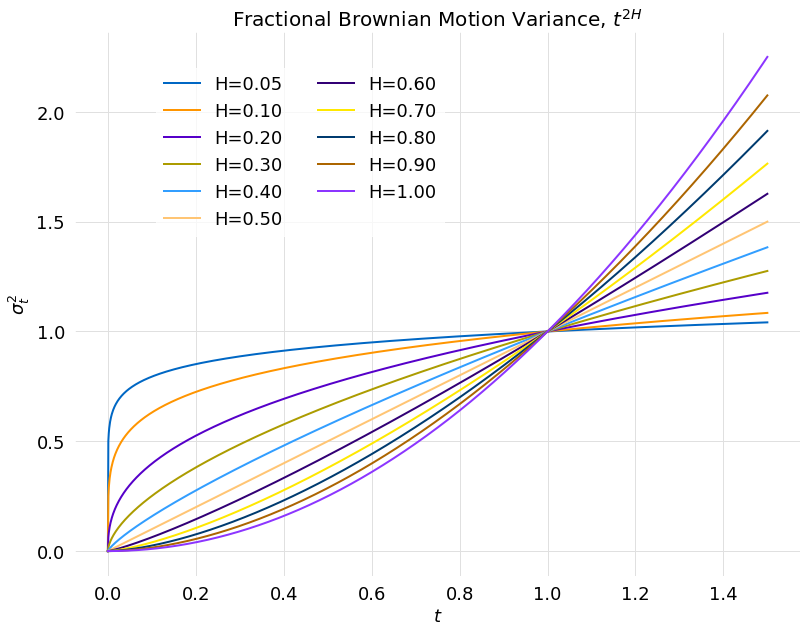

In [29]:
tmax = 1.5
Δt = 0.001
H_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
title = r"Fractional Brownian Motion Variance, $t^{2H}$"
comparison(var(H_vals, tmax, 0.0, Δt), title=title, labels=labels(H_vals), plot_type=DataPlotType.VAR)

## $R^H(t,s) = \frac{1}{2}[t^{2H}+s^{2H}-(t-s)^{2H}]$

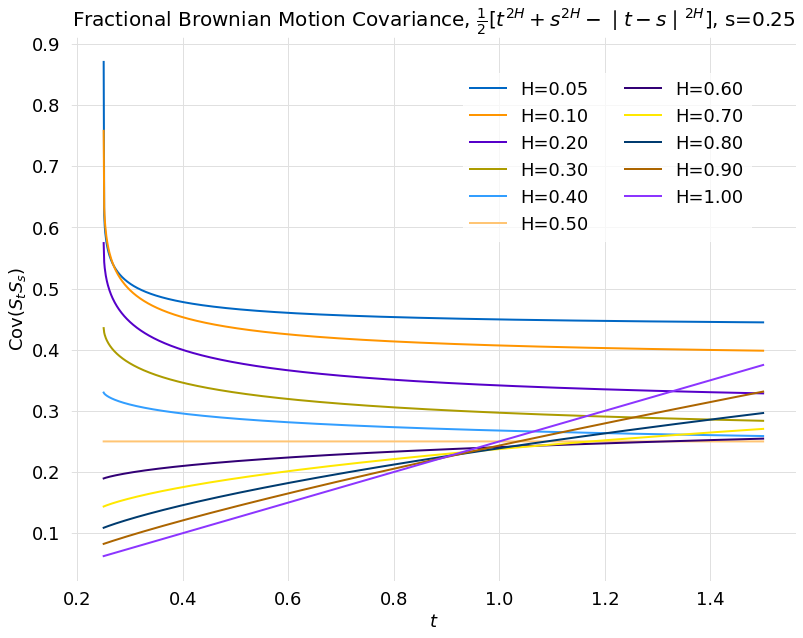

In [35]:
tmax = 1.5
Δt = 0.001
H_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
s = 0.25
title = r"Fractional Brownian Motion Covariance, $\frac{1}{2}[t^{2H} + s^{2H} - \mid t-s \mid^{2H}]$" + f", s={format(s, '1.2f')}"
comparison(cov(H_vals, tmax, s, Δt), title=title, labels=labels(H_vals), plot_type=DataPlotType.COV)

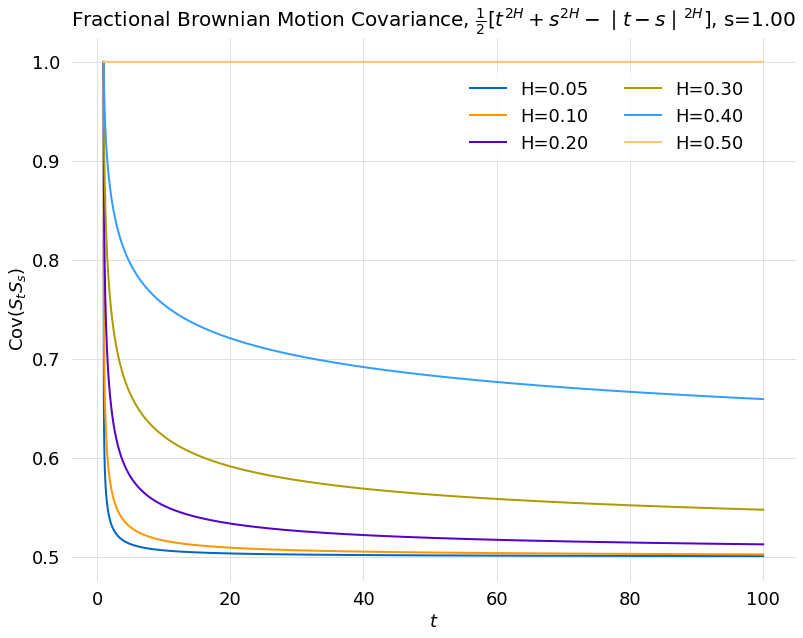

In [36]:
tmax = 100
Δt = 0.01
H_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
s = 1.0
title = r"Fractional Brownian Motion Covariance, $\frac{1}{2}[t^{2H} + s^{2H} - \mid t-s \mid^{2H}]$" + f", s={format(s, '1.2f')}"
comparison(cov(H_vals, tmax, s, Δt), title=title, labels=labels(H_vals), plot_type=DataPlotType.COV)

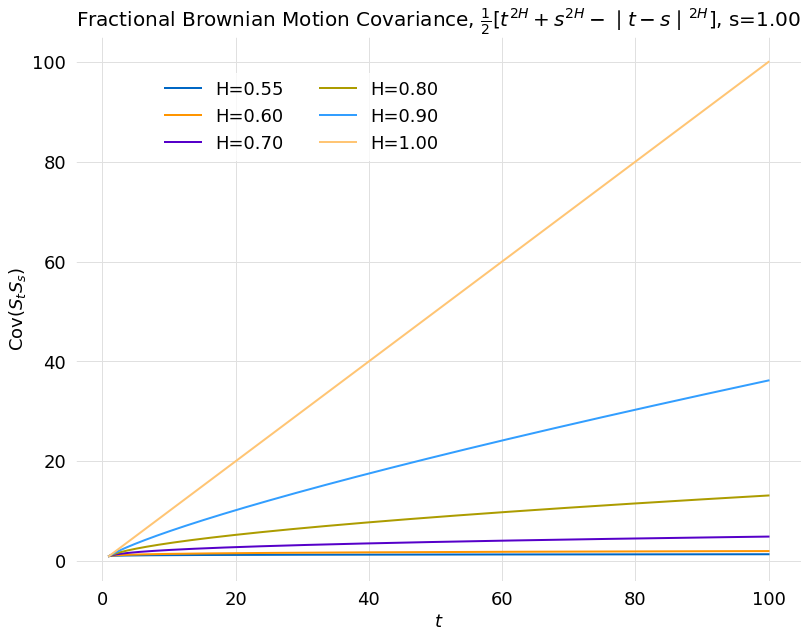

In [37]:
tmax = 100
Δt = 0.01
nsteps = int(tmax/Δt)
H_vals = [0.55, 0.6, 0.7, 0.8, 0.9, 1.0]
s = 1.0
title = r"Fractional Brownian Motion Covariance, $\frac{1}{2}[t^{2H} + s^{2H} - \mid t-s \mid^{2H}]$" + f", s={format(s, '1.2f')}"
comparison(cov(H_vals, tmax, s, Δt), title=title, labels=labels(H_vals), plot_type=DataPlotType.COV)

## $\rho^H_n = \frac{1}{2} [(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]$

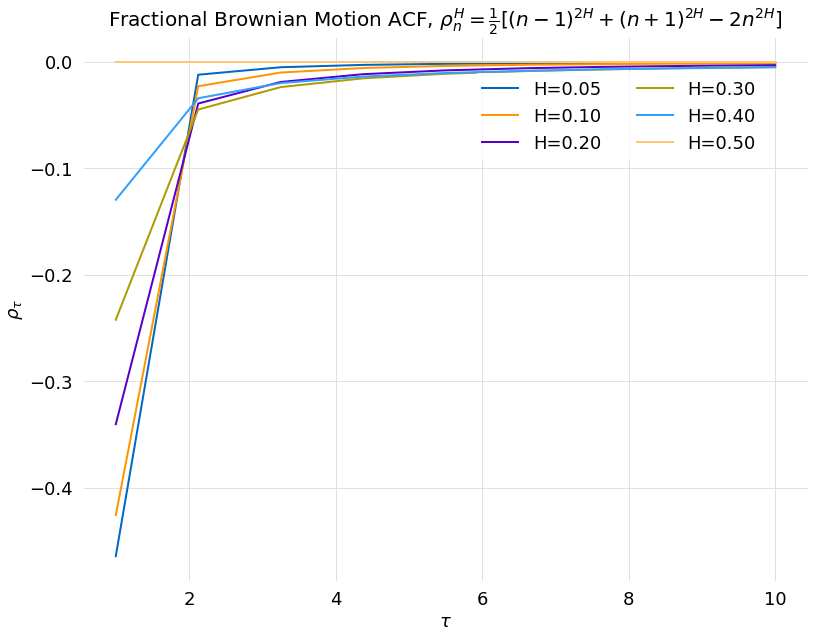

In [44]:
tmax = 10.0
Δt = 1.0
H_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
title = r"Fractional Brownian Motion ACF, $\rho^{H}_{n}=\frac{1}{2}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]$"
comparison(acf(H_vals, tmax, 1.0, Δt), title=title, labels=labels(H_vals), plot_type=DataPlotType.ACF)

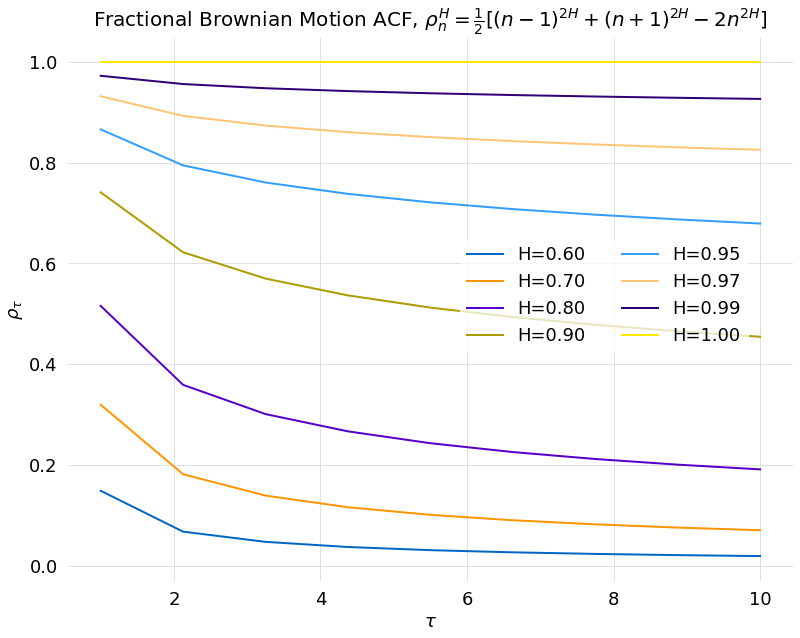

In [45]:
tmax = 10.0
Δt = 1.0
nsteps = int(tmax/Δt)
H_vals = [0.6, 0.7, 0.8, 0.9, 0.95, 0.975, 0.99, 1.0]
title = r"Fractional Brownian Motion ACF, $\rho^{H}_{n}=\frac{1}{2}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]$"
comparison(acf(H_vals, tmax, 1.0, Δt), title=title, labels=labels(H_vals), plot_type=DataPlotType.ACF)

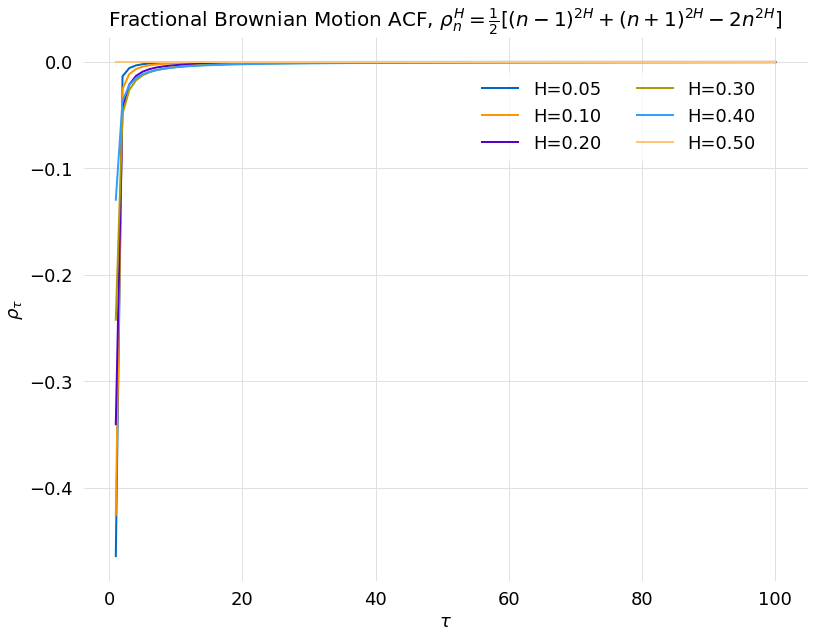

In [46]:
tmax = 100.0
Δt = 1.0
nsteps = int(tmax/Δt)
H_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
title = r"Fractional Brownian Motion ACF, $\rho^{H}_{n}=\frac{1}{2}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]$"
comparison(acf(H_vals, tmax, 1.0, Δt), title=title, labels=labels(H_vals), plot_type=DataPlotType.ACF)

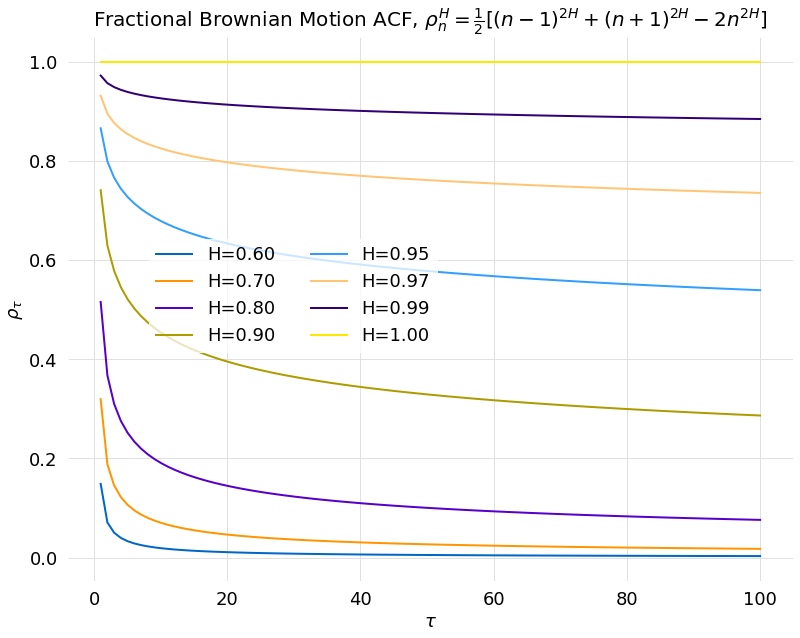

In [47]:
tmax = 100.0
Δt = 1.0
nsteps = int(tmax/Δt)
H_vals = [0.6, 0.7, 0.8, 0.9, 0.95, 0.975, 0.99, 1.0]
title = r"Fractional Brownian Motion ACF, $\rho^{H}_{n}=\frac{1}{2}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]$"
comparison(acf(H_vals, tmax, 1.0, Δt), title=title, labels=labels(H_vals), plot_type=DataPlotType.ACF)